## Learning outcomes
1. Geometric transformations: rotation, translation, affine transformation and perspective transformation.
2. Drawing functions
    - line
    - circle
    - ellipse
    - rectangle
    - text
3. Bitwise operations
    - OR, AND, XOR, NOT
4. Convolution: Smoothing and sharpening. This operations are central to CNN.

## Setup

In [1]:
import sys
assert sys. version_info >=(3, 7)

import numpy as np
import cv2 as cv
from util_func import *

In [2]:
!pip install scipy


[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## Geometric transformation

In [3]:
img = cv.imread("images/lena.jfif")

h, w = img.shape[:2]
tx = 50
ty = 80
M = np.float32([[1, 0, tx], [0, 1, ty]])

dst = cv.warpAffine(img, M, (w+tx, h+ty))

show_img("translation", dst)

## Rotation

In [35]:
yc, xc = h // 2, w // 2 
angle = 45

M = cv.getRotationMatrix2D((xc, yc), angle, 1)
dst = cv.warpAffine(img, M, (w, h))

show_img("rotation", dst)

## Affine transformation

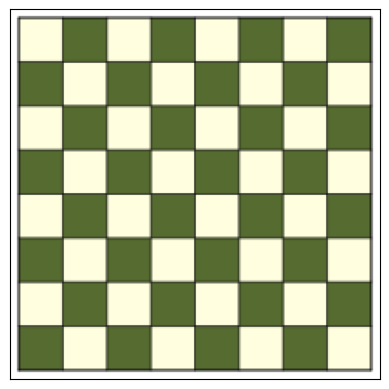

In [5]:
img = cv.imread("images/chessboard.png")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_copy = img.copy()

plt_img(img)

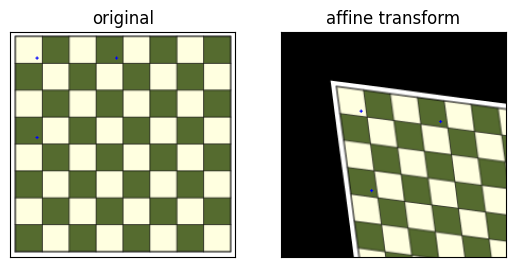

In [6]:
h, w = img.shape[:2]
# 3 pairs of points
p0 = np.float32([[25, 25], [100, 25], [25, 100]])
p1 = np.float32([[75, 75], [150, 85], [85, 150]])

for pt in p0:
    cv.circle(img, (int(pt[0]), int(pt[1])), 1, (0, 0, 255), -1)
    
# fet the M
M = cv.getAffineTransform(p0, p1)
dst = cv.warpAffine(img_copy, M, (w, h))

for pt in p1:
    cv.circle(dst, (int(pt[0]), int(pt[1])), 1, (0, 0, 255), -1)

plt.subplot(121), plt_img(img, title="original")
plt.subplot(122), plt_img(dst, title="affine transform")
plt.show()

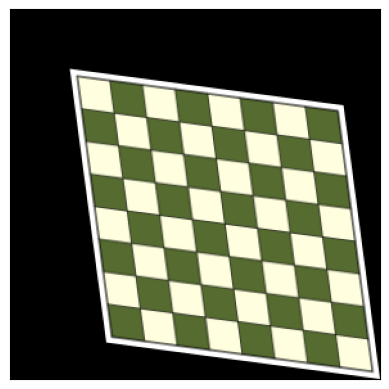

In [7]:
dst_new = cv.warpAffine(img_copy, M, (w+75, h+75))

plt_img(dst_new)

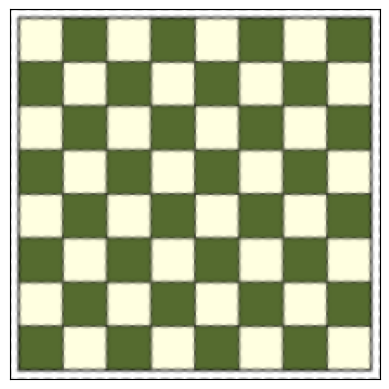

In [8]:
M_inv = cv.getAffineTransform(p1, p0)
ori_restore = cv.warpAffine(dst_new, M_inv, (w, h))

plt_img(ori_restore)

## Perspective transform

In [9]:
img = cv.imread("images/name_card_sample.webp")

show_img("name card", img, adjust=True)

In [10]:
# to get the corners, mouse callback function
p = []

def mouse(event, x, y, flags, params):
    if event == cv.EVENT_LBUTTONDOWN:
        print((x, y))
        p.append((x, y))
        cv. circle(img, (x, y), 2, (0, 0, 255), -1)
        cv.imshow("img", img)
        
cv.imshow("img", img)
cv.setMouseCallback("img", mouse)
cv.waitKey(0)
cv.destroyAllWindows()

(223, 201)
(1434, 86)
(1536, 527)
(131, 726)


In [11]:
from scipy.spatial.distance import euclidean

In [12]:
w1 = euclidean(p[0], p[1])
w2 = euclidean(p[2], p[3])

h1 = euclidean(p[0], p[3])
h2 = euclidean(p[1], p[2])

H = max(h1, h2)
W = max(w1, w2)

p_array = np.float32(p)
dst = np.float32([[0, 0], [W-1, 0], [W-1, H-1], [0, H-1]]) 

M = cv.getPerspectiveTransform(p_array, dst)
warp = cv.warpPerspective(img, M, (int(W), int(H)))

cv.namedWindow("img", cv.WINDOW_NORMAL)
cv.imshow("img", img)
show_img("warp", warp)

## Exercise

In [13]:
img = cv.imread("images/dice.jfif")

show_img("name card", img, adjust=True)

In [14]:
# to get the corners, mouse callback function
p = []

def mouse(event, x, y, flags, params):
    if event == cv.EVENT_LBUTTONDOWN:
        print((x, y))
        p.append((x, y))
        cv. circle(img, (x, y), 2, (0, 0, 255), -1)
        cv.imshow("img", img)
        
cv.imshow("img", img)
cv.setMouseCallback("img", mouse)
cv.waitKey(0)
cv.destroyAllWindows()

(12, 68)
(83, 73)
(84, 135)
(19, 131)


In [15]:
w1 = euclidean(p[0], p[1])
w2 = euclidean(p[2], p[3])

h1 = euclidean(p[0], p[3])
h2 = euclidean(p[1], p[2])

H = max(h1, h2)
W = max(w1, w2)

p_array = np.float32(p)
dst = np.float32([[0, 0], [W-1, 0], [W-1, H-1], [0, H-1]]) 

M = cv.getPerspectiveTransform(p_array, dst)
warp = cv.warpPerspective(img, M, (int(W), int(H)))

cv.namedWindow("img", cv.WINDOW_NORMAL)
cv.imshow("img", img)
show_img("warp", warp)

## Drawing functions

### Line

In [16]:
img = cv.imread("images/dog.jfif")

print(img.shape)

(168, 300, 3)


In [17]:
img_copy = img.copy()
cv.line(img_copy, (80, 150), (200, 50), (0, 0, 255), 4, cv.LINE_AA)
show_img("line", img_copy)

### circle

In [18]:
img_copy = img.copy()
cv.circle(img_copy, (145, 50), 40, (100, 100, 100), 2, cv.LINE_AA)
show_img("circle", img_copy)

### ellipse

In [19]:
img_copy = img.copy()
axes = (25, 50)
angle = 0

cv.ellipse(img_copy, (145, 50), axes, angle, 0, 360, (50, 100, 150), 2)
show_img("ellipse", img_copy)

### rectangle

In [20]:
img_copy = img.copy()
cv.rectangle(img_copy, (100, 10), (190, 90), (0, 0, 255), 4, cv.LINE_AA)
show_img("rectangle", img_copy)

### text

In [21]:
img_copy = img.copy()

cv.putText(img_copy,"I am a happy dog!", (15, 150), cv.FONT_HERSHEY_SIMPLEX, 
           0.7, (255, 0, 60), 2)
show_img("text", img_copy)

## Exercise: Drawing functions

In [22]:
img = np.zeros((400, 400), dtype=np.uint8)

yc, xc = img.shape[0] // 2, img.shape[1] // 2

radius = np.arange(20, 200, 15)

for r in radius:
    cv.circle(img, (xc, yc), r, 255, 2)
    
cv.putText(img, "Bulleye", (20, 385), cv.FONT_HERSHEY_SIMPLEX, 0.6, 255, 2)

show_img("bulleye", img)

## demo
We can develop a simple drawing tool / app with OpenCV GUI. Trackbar introduction

In [ ]:
WHITE = (255, 255, 255)
RED = (0, 0, 255)
BLUE = (255, 0, 0)
GREEN = (0, 255, 0)

CYAN = (255, 255, 0)
MAGENTA = (255, 0, 255)
YELLOW = (0, 255, 255)

colors = (RED, BLUE, GREEN, CYAN, MAGENTA, YELLOW, WHITE)

# define trackbar function, mouse callback function and finally a white loop to
# drawing
def nothing(x):
    pass

p0 = p1 = (0, 0)
def mouse(event, x, y, flags, params):
    global p0, p1
    if event==cv.EVENT_LBUTTONDOWN:
        p0 = (x, y)
        
    elif event==cv.EVENT_LBUTTONUP:
        p1 = (x, y)
        
        d = cv.getTrackbarPos("thickness", "window")
        if d==0:
            d=-1
        i = cv.getTrackbarPos("color", "window")
        color = colors[i]
        cv.rectangle(img, p0, p1, color, d)
        cv.imshow("window", img)

img = np.zeros((400, 400, 3), dtype=np.uint8)
cv.namedWindow("window")
cv.createTrackbar("color", "window", 0, 6, nothing)
cv.createTrackbar("thickness", "window", 0, 10, nothing)
cv.setMouseCallback("window", mouse)

while (1):
    cv.imshow("window", img)
    k = cv.waitKey(1) & 0xFF
    if k == 27:
        break
        
    if k==ord('c'):
        img[:] = 0

cv.destroyAllWindows()

## Bitwise operators

In [23]:
rect = np.zeros((400, 400), dtype=np.uint8)
rect[30:370, 30:370] = 255

circle = np.zeros((400, 400), dtype=np.uint8)
cv.circle(circle, (200, 200), 200, 255, -1)

cv.imshow("rectangle", rect)
show_img("circle", circle)

In [24]:
res_AND = cv.bitwise_and(rect, circle)
show_img("AND", res_AND)

In [25]:
res_OR = cv.bitwise_or(rect, circle)
show_img("OR", res_OR)

In [26]:
res_XOR = cv.bitwise_xor(rect, circle)
show_img("XOR", res_XOR)

In [11]:
res_NOT = cv.bitwise_not(rect)
show_img("NOT", res_NOT)

bitwise operations is one of the important process that make up segmentation pipeline.

In [27]:
img = cv.imread("images/dog.jfif")

# masking
h, w = img.shape[:2]
mask = np.zeros((h, w), dtype=np.uint8)

cv.circle(mask, (145, 50), 40, 255, -1)

face = cv.bitwise_and(img, img, mask=mask)

show_img("face", face)

## Convolution

### Identity kernel

In [28]:
kernel = np.zeros((3, 3))
kernel[1, 1] = 1

img = cv.imread("images/opencv_logo.png")

dst = cv.filter2D(img, -1, kernel)

cv.imshow("img", img)
show_img("identity", dst)

### Use cases
- CNN
- smoothing / denoising
- edge detection
- sharpening

In [29]:
# sharpening
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

img = cv.imread("images/dog.jfif")
sharpen = cv.filter2D(img, -1, kernel)

cv.imshow("dog", img)
show_img("sharpen", sharpen)

In [30]:
# Blurring
kernel = np.ones((5, 5)) / 25.0

blur = cv.filter2D(img, -1, kernel)

show_img("blur", blur)

In [31]:
unsharp_masking = cv.addWeighted(img, 1.75, blur, -0.75, 0)

show_img("unsharp masking", unsharp_masking)

### Blurring
4 functions:
- `cv.blur()` : average filter
- `cv.GaussianBlur()` : Gaussian filter, efficient in removing Gaussian noise
- `cv.medianBlur()` : median filter, eliminating salt and pepper noise
- `cv.bilateralFilter()` : edge-preserving filter

## Weekly activity

## Q1

In [40]:
!pip install imutils


[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Q1
import imutils

img = cv.imread("images/lena.jfif")

h, w = img.shape[:2]
yc, xc = h // 2, w // 2 
angle = -45

dst = imutils.rotate_bound(img, angle)

show_img("rotation", dst)

## Q2

In [3]:
# Q2
# Load two images
img1 = cv.imread('images/native-bee.png')
img2 = cv.imread('images/flower.jfif')

# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols]

# Now create a mask of logo and create its inverse mask also
img2gray = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)
ret, mask = cv.threshold(img2gray, 75, 255, cv.THRESH_BINARY)
mask_inv = cv.bitwise_not(mask)

# Now black-out the area of logo in ROI
img1_bg = cv.bitwise_and(roi,roi,mask = mask_inv)

# Take only region of logo from logo image.
img2_fg = cv.bitwise_and(img2,img2,mask = mask)

# Put logo in ROI and modify the main image
dst = cv.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst

cv.imshow('flower_bee',img1)
cv.waitKey(0)
cv.destroyAllWindows()

## Q3

In [4]:
# Q3

# 3 x 3 kernel
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

img = cv.imread("images/native-bee.png")
sharpen = cv.filter2D(img, -1, kernel)

cv.imshow("bee", img)
show_img("sharpen", sharpen)

The output image is sharpened with clearer edges.

In [5]:
# 5 x 5 kernel
kernel = np.array([[-1, -1, -1, -1, -1], [-1, -1, -1, -1, -1], 
                   [-1, -1, 25, -1, -1], [-1, -1, -1, -1, -1],
                   [-1, -1, -1, -1, -1]])

img = cv.imread("images/native-bee.png")
sharpen = cv.filter2D(img, -1, kernel)

cv.imshow("bee", img)
show_img("sharpen", sharpen)

The output image is over sharpened.

## Q4

In [6]:
# Q4

# average filter
img = cv.imread("images/noise_lena.jpg")

dst = cv.blur(img, (5, 5))

cv.imshow("original", img)
show_img("average filter", dst)

In [7]:
# Gaussian kernel
img = cv.imread("images/noise_lena.jpg")

dst = cv.GaussianBlur(img, (5, 5), 0)

cv.imshow("original", img)
show_img("Gaussian kernel", dst)

In [8]:
# median filter
img = cv.imread("images/noise_lena.jpg")

dst = cv.medianBlur(img, 5)

cv.imshow("original", img)
show_img("median filter", dst)

Median filter has the clearest image among all the smoothing techniques. Therefore, the noise present on the image is salt and pepper noise.